## Exploratory Data Analysis (EDA) on Telecommunications Data

### Data Extraction

In [1]:
import os
os.chdir('..')
from src.dbconnection import get_dataFrame_from_database

#### Extract telecommunications data from the XDR_data table

In [2]:
xdr_data = get_dataFrame_from_database()

In [3]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Check datatype of extracted dataset

In [4]:
dataType_of_Dataset=xdr_data.dtypes
dataType_of_Dataset.head(dataType_of_Dataset.size)

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

#### Number of rows and columns

In [5]:
print("Rows=", xdr_data.shape[0], "Columns=", xdr_data.shape[1])

Rows= 150001 Columns= 55


### Find any missing values

In [6]:
import pandas as pd
def find_missing_values(df):
    """
    Finds missing values and returns a summary.

    Args:
        df: The DataFrame to check for missing values.

    Returns:
        A summary of missing values, including the number of missing values per column.
    """

    null_counts = df.isnull().sum()
    missing_value = null_counts
    percent_of_missing_value = 100 * null_counts / len(df)
    data_type=df.dtypes

    missing_data_summary = pd.concat([missing_value, percent_of_missing_value,data_type], axis=1)
    missing_data_summary_table = missing_data_summary.rename(columns={0:"Missing values", 1:"Percent of Total Values",2:"DataType" })
    missing_data_summary_table = missing_data_summary_table[missing_data_summary_table.iloc[:, 1] != 0].sort_values('Percent of Total Values', ascending=False).round(1)

    print(f"From {df.shape[1]} columns selected, there are {missing_data_summary_table.shape[0]} columns with missing values.")

    return missing_data_summary_table
missing_summary = find_missing_values(xdr_data)
missing_summary.head(missing_summary.size)

From 55 columns selected, there are 41 columns with missing values.


,Missing values,Percent of Total Values,DataType
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [7]:
def replace_missing_values(data):
  """
  Replaces missing values in a DataFrame with the mean for numeric columns and the mode for categorical columns.

  Args:
    data: The input DataFrame.

  Returns:
    The DataFrame with missing values replaced.
  """

  # Identify numeric and categorical columns
  numeric_columns = data.select_dtypes(include='number').columns
  categorical_columns = data.select_dtypes(include='object').columns

  # Replace missing values in numeric columns with the mean
  for column in numeric_columns:
    column_mean = data[column].mean()
    data[column] = data[column].fillna(column_mean)

  # Replace missing values in categorical columns with the mode
  for column in categorical_columns:
    column_mode = data[column].mode().iloc[0]
    data[column] = data[column].fillna(column_mode)

  return data

### Replace missing value with appropriate method

In [8]:
xdr_data=replace_missing_values(xdr_data)

### Check replaced missing values

In [9]:
find_missing_values(xdr_data)


From 55 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### DataSet after replaced missing value

In [10]:
xdr_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


In [11]:
xdr_data['Dur. (ms).1']

0         1.823653e+09
1         1.365104e+09
2         1.361763e+09
3         1.321510e+09
4         1.089009e+09
              ...     
149996    8.123076e+07
149997    9.797070e+07
149998    9.824953e+07
149999    9.791063e+07
150000    1.046091e+08
Name: Dur. (ms).1, Length: 150001, dtype: float64

In [12]:
xdr_data['Dur. (ms)']

0         1.823652e+06
1         1.365104e+06
2         1.361762e+06
3         1.321509e+06
4         1.089009e+06
              ...     
149996    8.123000e+04
149997    9.797000e+04
149998    9.824900e+04
149999    9.791000e+04
150000    1.046086e+05
Name: Dur. (ms), Length: 150001, dtype: float64

## Convert Byte into MB

In [13]:
def convertByteIntoMegaByte(data):
    # We Have to convert some the data into MB or TB or GB
    megabyte=1*10e+5
    data['Bearer Id']=data['Bearer Id']/megabyte
    data['Bearer Id']=data['Bearer Id']/megabyte
    data['Bearer Id']=data['Bearer Id']/megabyte

    data['IMSI']=data['IMSI']/megabyte
    data['IMSI']=data['IMSI']/megabyte
    data['MSISDN/Number']=data['MSISDN/Number']/megabyte
    data['MSISDN/Number']=data['MSISDN/Number']/megabyte
    data['IMEI']=data['IMEI']/megabyte
    data['IMEI']=data['IMEI']/megabyte

    for column in data.columns:
        if 'Bytes' in column:
            data[column]=data[column]/megabyte
    return data

In [14]:
xdr_data=convertByteIntoMegaByte(xdr_data)

In [15]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13.114483,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,208.201448,0.033665,35.521210,9.16456699548519E+015,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,13.114483,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,208.201909,0.033682,35.794009,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,13.114483,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,208.200314,0.033761,35.281510,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,13.114483,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,208.201402,0.033750,35.356610,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,13.114483,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,208.201401,0.033700,35.407010,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


### Find  outliers

In [16]:
def get_outlier_summary(data):
    """
    Calculates outlier summary statistics for a DataFrame.

    Args:
        data : Input DataFrame.

    Returns:
        Outlier summary DataFrame.
    """

    outlier_summary = pd.DataFrame(columns=['Variable', 'Number of Outliers'])
    data = data.select_dtypes(include='number')

    for column_name in data.columns:
        q1 = data[column_name].quantile(0.25)
        q3 = data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

        outlier_summary = pd.concat(
            [outlier_summary, pd.DataFrame({'Variable': [column_name], 'Number of Outliers': [outliers.shape[0]]})],
            ignore_index=True
        )
    non_zero_count = (outlier_summary['Number of Outliers'] > 0).sum()
    print(f"From {data.shape[1]} selected numerical columns, there are {non_zero_count} columns with outlier values.")

    return outlier_summary


In [17]:
outlier_summary=get_outlier_summary(xdr_data)
outlier_summary.head(outlier_summary.size)

From 50 selected numerical columns, there are 31 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),7184
4,IMSI,13250
5,MSISDN/Number,24742
6,IMEI,0
7,Avg RTT DL (ms),7718
8,Avg RTT UL (ms),8975
9,Avg Bearer TP DL (kbps),13235


### Box Plot before remove outlier

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
def getBoxPlotToCheckOutlier(xdr_data,variables):
    for variable in variables:
        sns.boxplot(data=xdr_data[variable], orient='v')
        plt.title(f'Box Plot {variable}')
        plt.xlabel('Values')
        plt.ylabel(variable)
        plt.show()

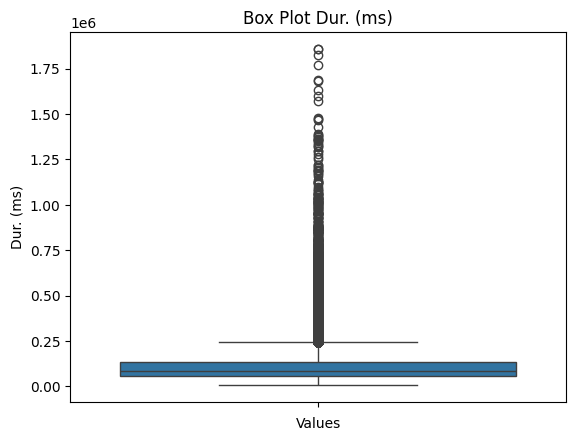

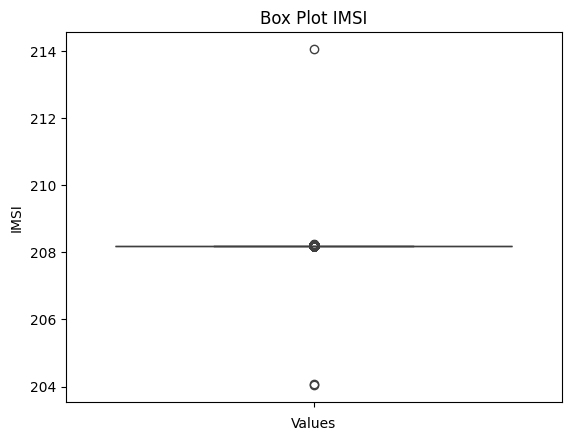

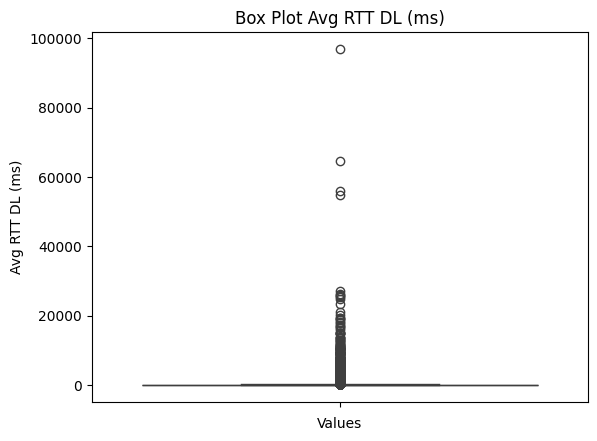

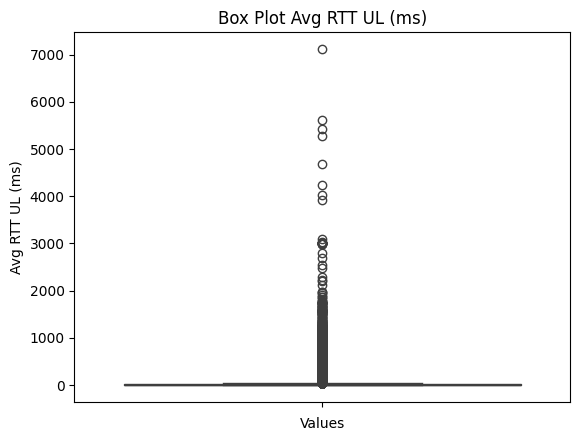

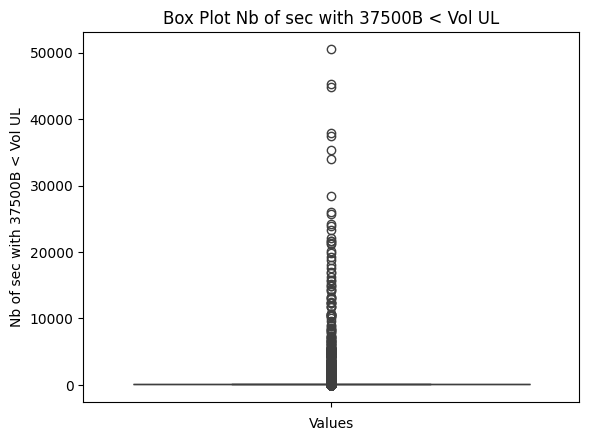

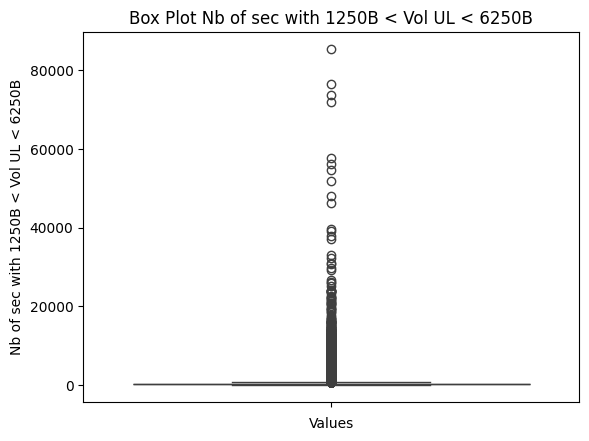

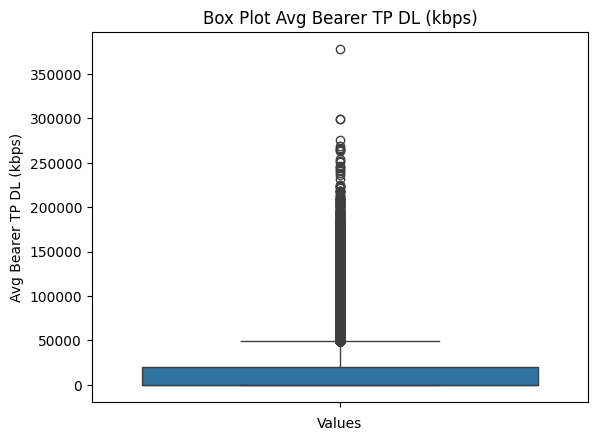

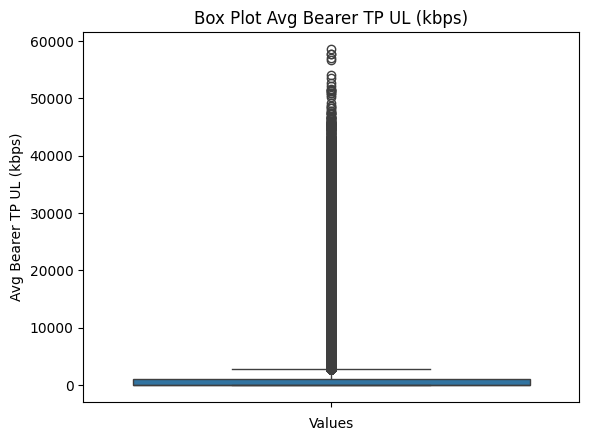

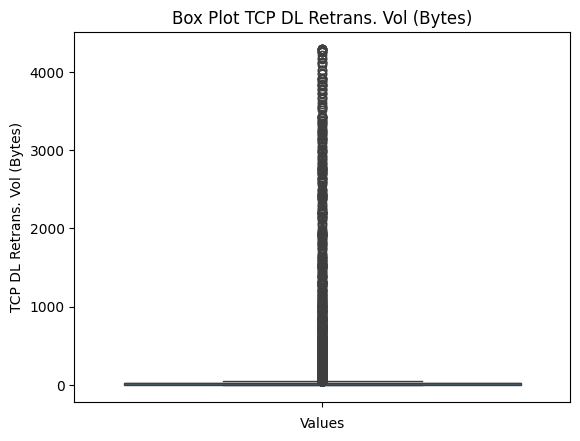

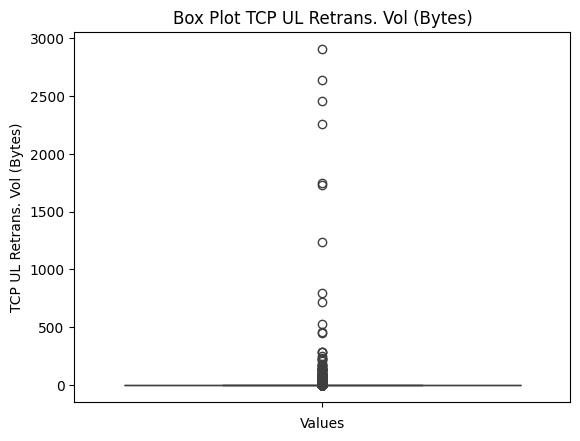

In [19]:
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','IMSI','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 37500B < Vol UL','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])

### Remove outliers

In [20]:
def remove_outliers_winsorization(xdr_data):
    """
    Removes outliers from specified columns of a DataFrame using winsorization.

    Args:
        data: The input DataFrame.
        column_names (list): A list of column names to process.

    Returns:
        The DataFrame with outliers removed.
    """
    # data = xdr_data.select_dtypes(include='number')
    for column_name in xdr_data.select_dtypes(include='number').columns:
        q1 = xdr_data[column_name].quantile(0.25)
        q3 = xdr_data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        xdr_data[column_name] = xdr_data[column_name].clip(lower_bound, upper_bound)

    return xdr_data

In [21]:
# Remove outliers using winsorization
remove_outliers=remove_outliers_winsorization(xdr_data)

In [22]:
get_outlier_summary(xdr_data)

From 50 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),0
4,IMSI,0
5,MSISDN/Number,0
6,IMEI,0
7,Avg RTT DL (ms),0
8,Avg RTT UL (ms),0
9,Avg Bearer TP DL (kbps),0


### Box Plot After remove Outlier

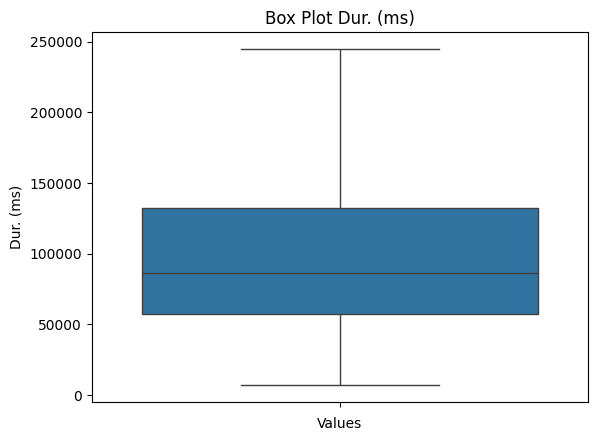

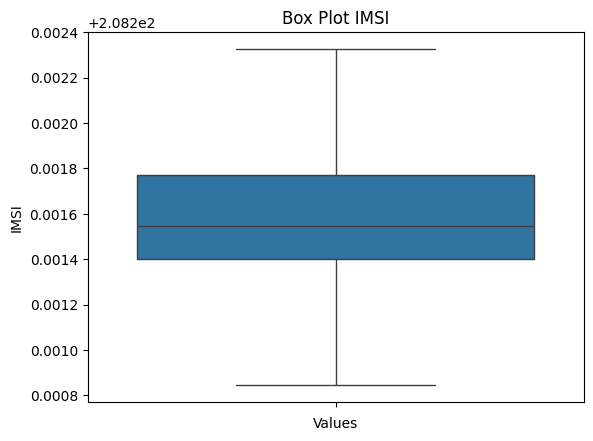

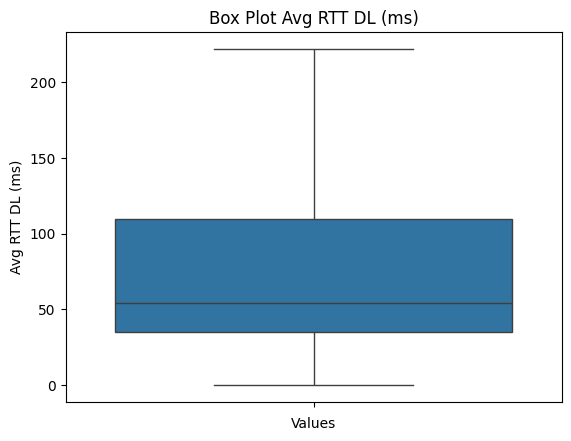

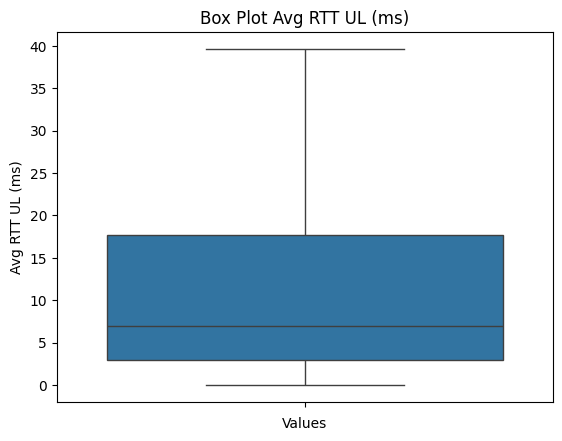

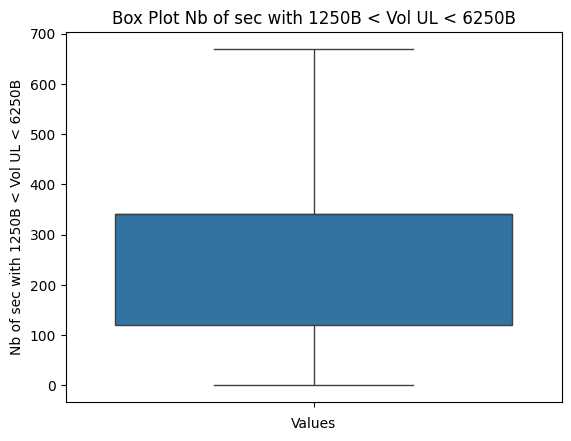

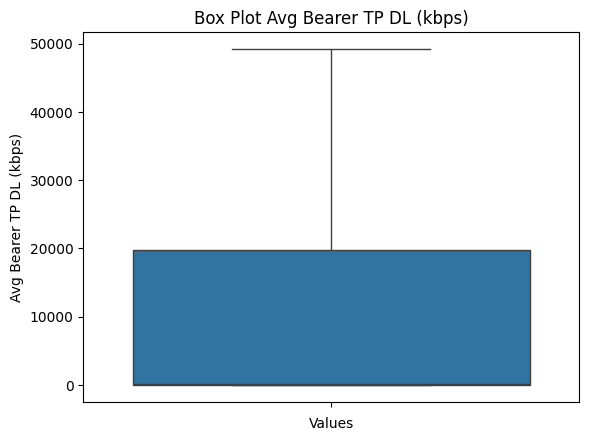

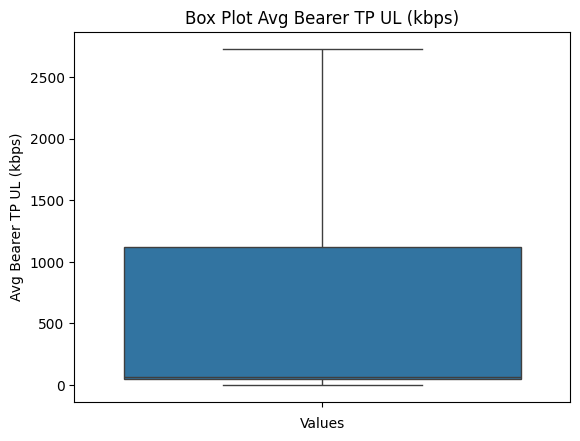

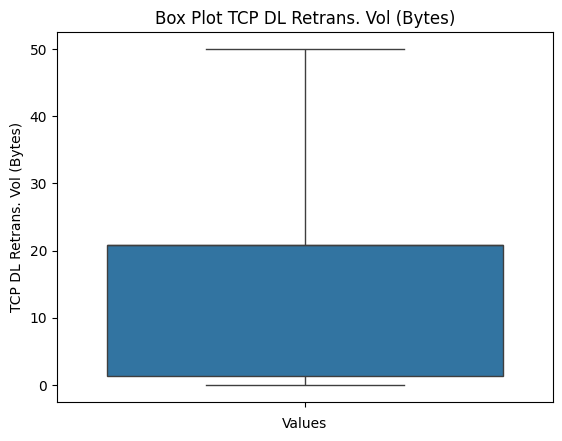

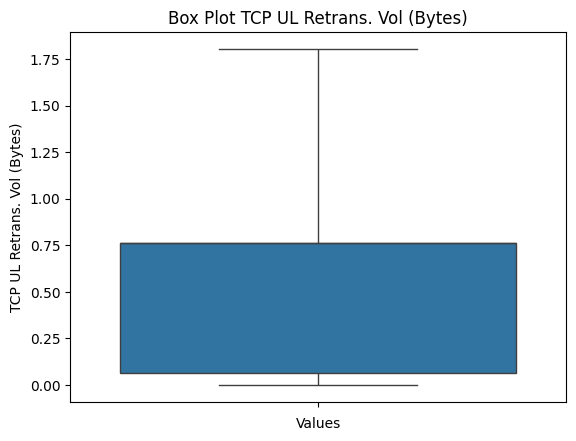

In [23]:
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','IMSI','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])

### User overview analysis

#### User Device Analysis

In [24]:
top_handsets = xdr_data['Handset Type'].value_counts().head(10)
top_manufacturers = xdr_data['Handset Manufacturer'].value_counts().head(3)

### Top Five handset types

In [25]:
print(top_handsets)

Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


<Axes: xlabel='Handset Type'>

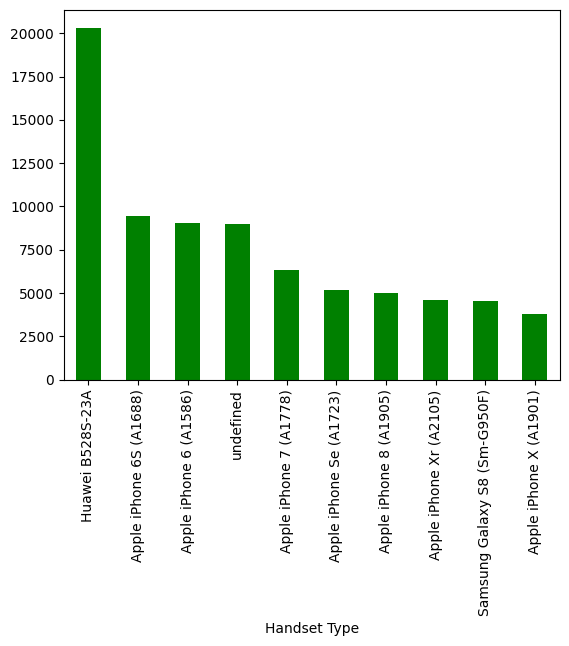

In [26]:
top_handsets.plot(kind='bar',color='green')

#### Top three handset manufacturers

In [27]:
top_manufacturers.head()

Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64

<Axes: xlabel='Handset Manufacturer'>

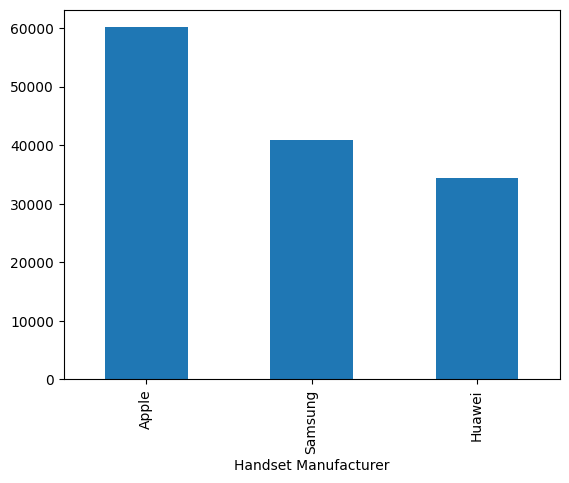

In [28]:
top_manufacturers.plot(kind='bar')

### The top 5 handset type per top 3 handset manufacturer

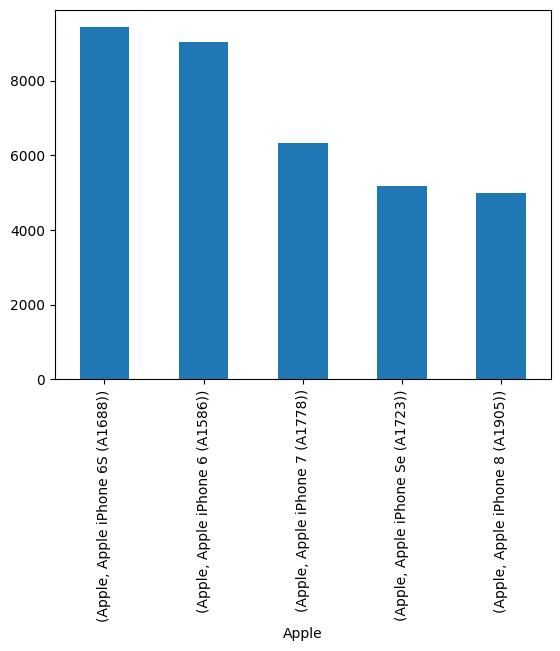

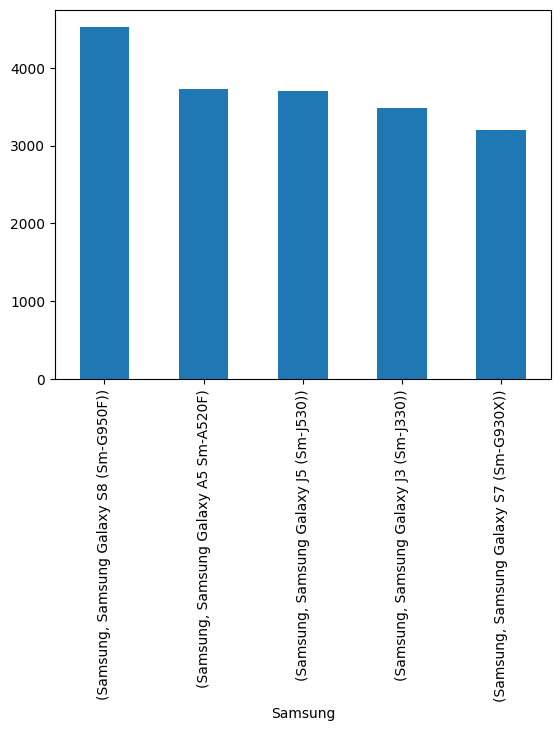

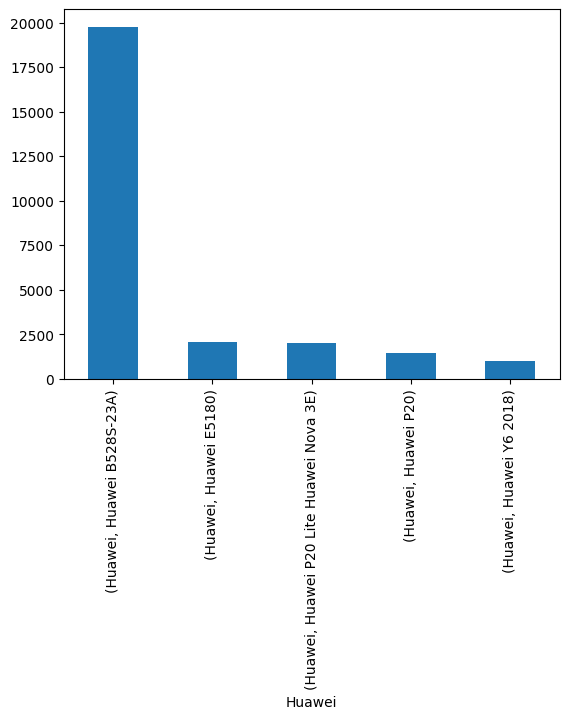

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for top manufacturers
filtered_data = xdr_data[xdr_data['Handset Manufacturer'].isin(top_manufacturers.index)]

# Group by 'Handset Manufacturer' and get the top 5 handsets for each manufacturer
for h_manufacturer in top_manufacturers.index:
    top_5_handsets_per_manufacturer = filtered_data[filtered_data['Handset Manufacturer']==h_manufacturer].groupby('Handset Manufacturer')['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer.plot(kind='bar')
    plt.xlabel(h_manufacturer)
    plt.show()

In [30]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13.114483,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,208.201448,0.033665,35.521210,9.16456699548519E+015,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,13.114483,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,208.201909,0.033682,35.794009,L77566A,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,13.114483,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,208.200846,0.033735,35.281510,D42335A,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,13.114483,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,208.201402,0.033735,35.356610,T21824A,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,13.114483,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,208.201401,0.033700,35.407010,D88865A,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


### Aggregate Each Application per User

In [31]:
def aggregate_xdr_data(data):
    """Aggregates xDR data per user and application.

    Args:
        The xDR data.

    Returns:
        The aggregated xDR data.

    """
    agg_xdr_data=pd.DataFrame(data)
    agg_xdr_data['Total_DL_and_UL_data'] = agg_xdr_data['Total DL (Bytes)'] + agg_xdr_data['Total UL (Bytes)']
    agg_xdr_data['Social Media Data'] = agg_xdr_data['Social Media DL (Bytes)']+agg_xdr_data['Social Media UL (Bytes)']
    agg_xdr_data['Google Data'] = agg_xdr_data['Google DL (Bytes)']+agg_xdr_data['Gaming UL (Bytes)']
    agg_xdr_data['Email Data']=agg_xdr_data['Email DL (Bytes)']+agg_xdr_data['Email UL (Bytes)']
    agg_xdr_data['YouTube Data']=agg_xdr_data['Email DL (Bytes)']+agg_xdr_data['Email UL (Bytes)']
    agg_xdr_data['Netflix Data']=agg_xdr_data['Netflix DL (Bytes)']+agg_xdr_data['Netflix UL (Bytes)']
    agg_xdr_data['Gaming Data']=agg_xdr_data['Gaming DL (Bytes)']+agg_xdr_data['Gaming UL (Bytes)']
    agg_xdr_data['Other Data'] = agg_xdr_data['Other DL (Bytes)']+agg_xdr_data['Other UL (Bytes)']

    columns = ['MSISDN/Number', 'Dur. (ms)','Bearer Id','Other Data','Gaming Data','Netflix Data','YouTube Data','Email Data', 'Google Data','Social Media Data', 'Total_DL_and_UL_data']

    df = agg_xdr_data[columns]

    # Aggregate data
    aggregated_df = df.groupby('MSISDN/Number').agg(
        Total_DL_And_UL=('Total_DL_and_UL_data', sum),
        Total_Social_Media_Data=('Social Media Data',sum),
        Total_Google_Data=('Google Data', sum),
        Total_Email_Data=('Email Data',sum),
        Total_YouTube_Data=('YouTube Data', sum),
        Total_Netflix_Data=('Netflix Data',sum),
        Total_Gaming_Data=('Gaming Data', sum),
        Total_Other_Data=('Other Data',sum),
        Total_Duration_Data=('Dur. (ms)',sum),
        Total_xDR_Sessions=('Bearer Id',sum)
    )

    return aggregated_df


In [32]:
aggregated_xdr_data=aggregate_xdr_data(xdr_data)
aggregated_xdr_data.head(10)


/tmp/ipykernel_15954/936832312.py:26: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_df = df.groupby('MSISDN/Number').agg(


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
MSISDN/Number,,,,,,,,,,
0.033602,182951.226284,665.487661,4923.336797,818.423801,818.423801,8047.787282,159718.700372,158876.532710,34112179.0,3603.373041
0.033602,339.616950,0.602474,22.361212,2.835412,2.835412,12.478941,283.095310,786.175881,38503.0,13.114484
0.033602,900.610946,3.036290,9.613563,3.596083,3.596083,16.951885,839.795046,682.485438,52478.0,6.917538
0.033602,1587.337140,4.208402,26.033981,3.285166,3.285166,59.761378,1423.399118,1326.388626,120298.0,14.627709
0.033602,178.330679,2.489630,14.319698,3.264827,3.264827,24.873000,110.287002,82.594113,176022.0,13.114484
0.033602,334.691441,0.107064,6.820104,1.872526,1.872526,23.238525,288.996494,332.167601,127918.0,7.349883
0.033602,1315.473749,5.759823,33.188094,5.832060,5.832060,36.788932,1159.205986,1123.033280,82590.0,14.627709
0.033602,1335.339310,2.262100,31.151078,5.984782,5.984782,50.726318,1200.017097,237.557823,176459.0,14.627709
0.033602,437.461975,2.785677,2.586786,0.774081,0.774081,22.863972,380.052268,250.215756,86780.0,13.114484


### Exploratory Data Analysis (EDA) on Aggregated Data

In [33]:
aggregated_xdr_data.describe()

,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
count,9.003800e+04,90038.000000,90038.000000,90038.000000,90038.000000,90038.000000,9.003800e+04,9.003800e+04,9.003800e+04,90038.000000
mean,8.259312e+02,3.045818,23.388865,3.763607,3.763607,37.698678,7.169239e+02,7.153117e+02,1.658846e+05,16.891105
std,4.007920e+04,148.931722,1138.542409,184.112576,184.112576,1843.867901,3.474940e+04,3.501087e+04,8.112136e+06,825.113896
min,3.324901e+01,0.001563,0.023708,0.018176,0.018176,0.184569,3.063580e-01,5.117690e-01,7.146000e+03,6.917538
25%,3.585559e+02,1.210091,11.381826,1.672597,1.672597,18.564679,2.881509e+02,2.849859e+02,7.007000e+04,7.349883
50%,6.183490e+02,2.300906,16.708112,2.793700,2.793700,26.700729,5.429110e+02,5.385891e+02,1.020740e+05,13.042426
75%,8.569936e+02,3.304691,23.536615,3.842333,3.842333,37.903925,7.772646e+02,7.744172e+02,1.727990e+05,14.627709
max,1.202471e+07,44682.944435,341596.376924,55238.582358,55238.582358,553214.085775,1.042554e+07,1.050403e+07,2.433741e+09,247554.418656


## Variable transformations

### Segment the users into the top five decile classes and Calculate Total Data per Decile Class

In [34]:
import pandas as pd

def segment_users_and_calculate_total_data(data):
  """
  Segments users into the top five decile classes based on total session duration and calculates the total data (DL+UL) per decile class.

  Args:
    data: The input DataFrame containing user information data.

  Returns:
    A DataFrame with decile class and total data per decile class.
  """

  # Calculate total DL and UL data per user
  data['Total_DL_+_UL'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

  # Segment users into top five decile classes based on total session duration
  decile_labels = ['Decile 1', 'Decile 2', 'Decile 3', 'Decile 4', 'Decile 5']
  data['decile_class'] = pd.qcut(data['Dur. (ms)'], 5, labels=decile_labels)

  # Calculate total data per decile class
  total_data_per_decile = data.groupby('decile_class')['Total_DL_+_UL'].sum()

  return total_data_per_decile

total_data_per_decile = segment_users_and_calculate_total_data(xdr_data)
print(total_data_per_decile)

decile_class
Decile 1    1.488405e+07
Decile 2    2.361998e+07
Decile 3    6.089086e+06
Decile 4    1.485374e+07
Decile 5    1.491834e+07
Name: Total_DL_+_UL, dtype: float64


/tmp/ipykernel_15954/1645049578.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = data.groupby('decile_class')['Total_DL_+_UL'].sum()


### Graphical Representation of Total Dl and Ul with in Decile

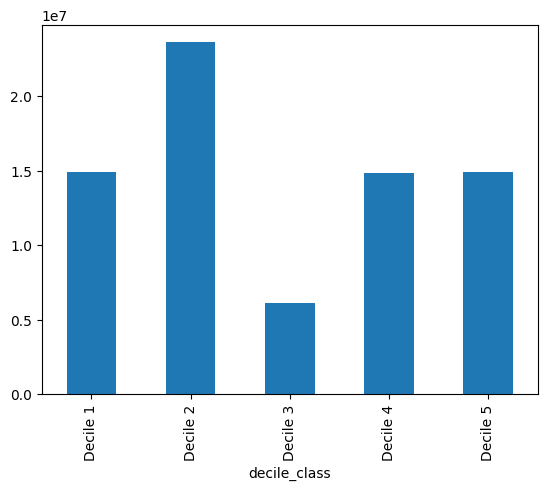

In [35]:
total_data_per_decile.plot(kind='bar')
plt.show()

In [36]:
xdr_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
count,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,...,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,10.138875,499.188200,498.800880,99572.128983,208.201517,0.033670,48.474548,72.862020,12.037797,11112.355328,...,11.009410,11.626852,11.001755,422.044703,8.288398,421.100544,8.264799,41.121201,454.643430,495.764631
std,2.883600,288.610872,288.096693,59084.184127,0.000393,0.000035,22.373591,51.361714,11.040917,17189.349903,...,6.345423,6.725218,6.359490,243.967494,4.782700,243.205010,4.769004,11.269234,244.142061,244.380618
min,6.917538,0.000000,0.000000,7142.000000,208.200846,0.033602,0.440015,0.000000,0.000000,0.000000,...,0.000105,0.000042,0.000035,0.002516,0.000059,0.003290,0.000148,9.503715,7.114041,28.956107
25%,7.349883,250.000000,251.000000,57442.000000,208.201401,0.033652,35.462610,35.000000,3.000000,43.000000,...,5.517965,5.777156,5.475981,210.473253,4.128476,210.186872,4.145943,33.222029,243.107173,284.476442
50%,7.349883,499.000000,500.000000,86399.000000,208.201546,0.033664,35.722410,54.000000,7.000000,63.000000,...,11.013447,11.642217,10.996384,423.408104,8.291208,421.803006,8.267071,41.143242,455.840911,496.896342
75%,13.042426,749.000000,750.000000,132430.000000,208.201772,0.033685,86.119704,109.795706,17.662883,19710.000000,...,16.515562,17.470478,16.507268,633.174167,12.431624,631.691786,12.384148,49.034238,665.705138,706.500344
max,13.186541,999.000000,999.000000,244912.000000,208.202327,0.033735,99.001201,221.989265,39.657207,49210.500000,...,22.011962,23.259189,22.011955,843.441889,16.558794,843.442489,16.558816,72.752552,902.969616,953.624448


### Non-Graphical 
### Univariate Analysis: Dispersion Parameters

In [37]:
import pandas as pd

def compute_dispersion_parameters(data):
  """
  Computes various dispersion parameters for a DataFrame.

  Args:
    data : The input DataFrame.

  Returns:
    A DataFrame containing dispersion parameters for each numeric column.
  """

  numeric_columns = data.select_dtypes(include='number').columns

  dispersion_params = pd.DataFrame(index=['Range', 'Variance', 'Std Dev', 'IQR', 'Coef Var'], columns=numeric_columns)

  for column in numeric_columns:
    dispersion_params.loc['Range', column] = data[column].max() - data[column].min()
    dispersion_params.loc['Variance', column] = data[column].var()
    dispersion_params.loc['Std Dev', column] = data[column].std()
    dispersion_params.loc['IQR', column] = data[column].quantile(0.75) - data[column].quantile(0.25)
    dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()

  return dispersion_params
dispersion_results = compute_dispersion_parameters(xdr_data)

/tmp/ipykernel_15954/828796529.py:23: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
/tmp/ipykernel_15954/828796529.py:23: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
/tmp/ipykernel_15954/828796529.py:23: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()


In [38]:
dispersion_results.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
Range,6.269004,999.0,999.0,237770.0,0.001481,0.000133,98.561186,221.989265,39.657207,49210.5,...,22.011857,23.259147,22.01192,843.439373,16.558735,843.439199,16.558668,63.248836,895.855575,924.668341
Variance,8.315146,83296.235554,82999.704445,3490940814.010637,0.0,0.0,500.577559,2638.025639,121.901858,295473750.078073,...,40.264398,45.228558,40.44311,59520.138298,22.874216,59148.676796,22.743396,126.995624,59605.345737,59721.88643
Std Dev,2.8836,288.610872,288.096693,59084.184127,0.000393,0.000035,22.373591,51.361714,11.040917,17189.349903,...,6.345423,6.725218,6.35949,243.967494,4.7827,243.20501,4.769004,11.269234,244.142061,244.380618
IQR,5.692543,499.0,499.0,74988.0,0.00037,0.000033,50.657095,74.795706,14.662883,19667.0,...,10.997597,11.693322,11.031287,422.700914,8.303148,421.504914,8.238205,15.812209,422.597965,422.023902
Coef Var,0.28441,0.57816,0.577579,0.593381,0.000002,0.001049,0.461553,0.704918,0.917188,1.546868,...,0.576364,0.578421,0.578043,0.578061,0.577035,0.577546,0.577026,0.274049,0.536997,0.492937


### Graphical 
### Univariate Analysis

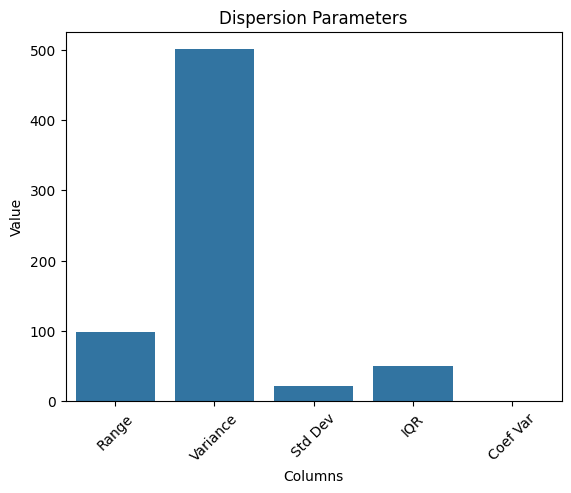

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=dispersion_results['IMEI'])
plt.title('Dispersion Parameters')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()



### Bivariate Analysis
### Relationship Between Each Application and Total Data DL and UL

In [40]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,13.114483,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,208.201448,0.033665,35.521210,9.16456699548519E+015,...,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5
1,13.114483,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,208.201909,0.033682,35.794009,L77566A,...,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5
2,13.114483,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,208.200846,0.033735,35.281510,D42335A,...,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5
3,13.114483,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,208.201402,0.033735,35.356610,T21824A,...,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5
4,13.114483,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,208.201401,0.033700,35.407010,D88865A,...,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5


### Bivariate using correlation

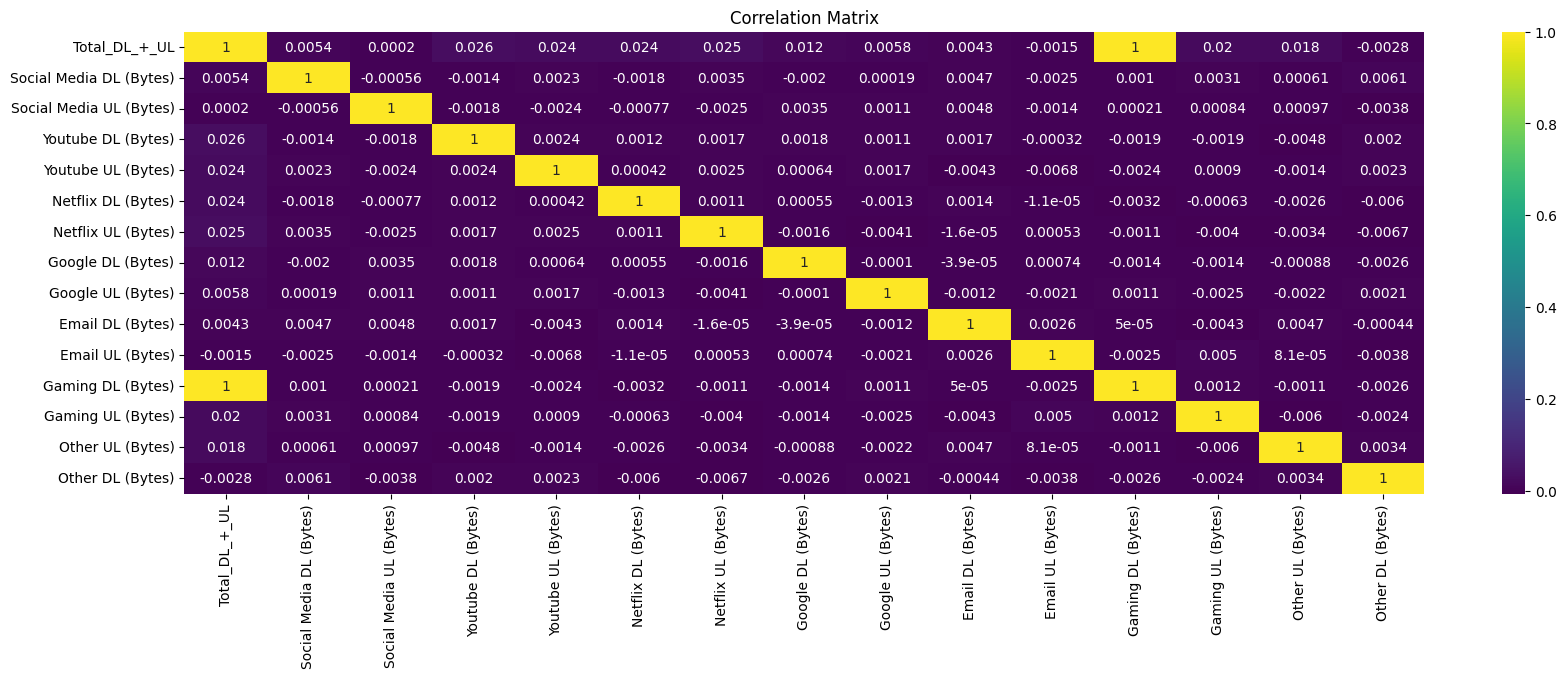

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = xdr_data[['Total_DL_+_UL','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)']].corr()
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')

plt.show()

### Correlation Analysis
### Computing a Correlation Matrix for Each Application

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlationBetweenApplication(data):
        agg_xdr_data = pd.DataFrame(data)
        agg_xdr_data['Social Media Data'] = agg_xdr_data['Social Media DL (Bytes)']+agg_xdr_data['Social Media UL (Bytes)']
        agg_xdr_data['Google Data'] = agg_xdr_data['Google DL (Bytes)']+agg_xdr_data['Gaming UL (Bytes)']
        agg_xdr_data['Email Data']=agg_xdr_data['Email DL (Bytes)']+agg_xdr_data['Email UL (Bytes)']
        agg_xdr_data['YouTube Data']=agg_xdr_data['Email DL (Bytes)']+agg_xdr_data['Email UL (Bytes)']
        agg_xdr_data['Netflix Data']=agg_xdr_data['Netflix DL (Bytes)']+agg_xdr_data['Netflix UL (Bytes)']
        agg_xdr_data['Gaming Data']=agg_xdr_data['Gaming DL (Bytes)']+agg_xdr_data['Gaming UL (Bytes)']
        agg_xdr_data['Other Data'] = agg_xdr_data['Other DL (Bytes)']+agg_xdr_data['Other UL (Bytes)']
        return agg_xdr_data;

In [43]:
applicationData=correlationBetweenApplication(xdr_data)

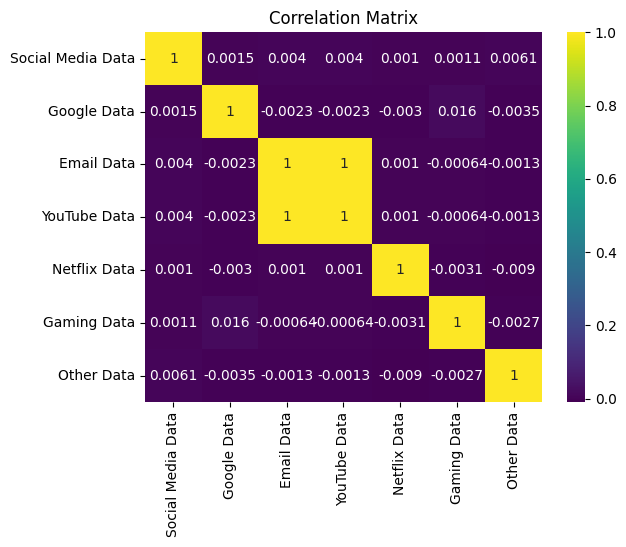

In [44]:
correlation_matrix = applicationData[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### Principal Component Analysis (PCA) for Dimensionality Reduction

In [45]:
import pandas as pd
from sklearn.decomposition import PCA


# Select only the desired columns
data_selected = applicationData[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']]

data_standardized = (data_selected - data_selected.mean()) / data_selected.std()

# Perform PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(data_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the original DataFrame with the principal components
final_df = pd.concat([principal_df, xdr_data], axis=1)

In [46]:
principal_df.head(10)

,PC1,PC2
0,1.903229,0.067314
1,-1.738618,-0.904089
2,1.461045,-1.183910
3,-0.263278,1.653893
4,-0.201224,-0.250238
5,0.847247,2.031420
6,-0.224168,-1.209967
7,1.641102,1.405646
8,1.471625,1.279439
9,-1.970841,0.979452


In [47]:
final_df.head()

,PC1,PC2,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,1.903229,0.067314,13.114483,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,208.201448,0.033665,...,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5
1,-1.738618,-0.904089,13.114483,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,208.201909,0.033682,...,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5
2,1.461045,-1.183910,13.114483,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,208.200846,0.033735,...,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5
3,-0.263278,1.653893,13.114483,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,208.201402,0.033735,...,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5
4,-0.201224,-0.250238,13.114483,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,208.201401,0.033700,...,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5


## User Engagement Analysis 

In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### Aggregate metrics per customer

In [49]:
def analyze_user_engagement(data):
    """
    Analyzes user engagement based on session metrics and segments users into clusters.

    Args:
      data: The input DataFrame containing user data.

    Returns:
      A DataFrame with segmented users and engagement metrics.
    """

    # Aggregate metrics per customer ID
    aggregated_data = data.groupby('MSISDN/Number').agg({'Bearer Id': 'sum',
                                                        'Dur. (ms)': 'sum',
                                                        'Total_DL_+_UL': 'sum'})

  
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(aggregated_data)

    normalized_data = pd.DataFrame(normalized_data)

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    aggregated_data['clusters'] = clusters

    # Compute minimum, maximum, average, and total metrics per cluster
    cluster_stats = aggregated_data.groupby('clusters').agg(['min', 'max', 'mean', 'sum'])

    # Aggregate user total traffic per application
    traffic_per_app = data.groupby(['MSISDN/Number','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)', 'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other UL (Bytes)'])['Total_DL_+_UL'].sum().reset_index()
    top_10_most_engaged_users = traffic_per_app.groupby(['MSISDN/Number','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)', 'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other UL (Bytes)'])['Total_DL_+_UL'].sum().nlargest(10)

    return aggregated_data, cluster_stats, top_10_most_engaged_users,normalized_data,clusters


aggregated_data, cluster_stats, top_10_most_engaged_users,normalized_data,engagement_clusters = analyze_user_engagement(xdr_data)

In [50]:
aggregated_data.head()

,Bearer Id,Dur. (ms),Total_DL_+_UL,clusters
MSISDN/Number,,,,
0.033602,3603.373041,34112179.0,182951.226284,2
0.033602,13.114484,38503.0,339.616950,0
0.033602,6.917538,52478.0,900.610946,0
0.033602,14.627709,120298.0,1587.337140,0
0.033602,13.114484,176022.0,178.330679,0


### Top 10 most engaged users per application

In [51]:
print(top_10_most_engaged_users)

MSISDN/Number  Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube UL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other UL (Bytes)
0.033675       10.979931          3.515773           2.432643          0.631541          21.501662           11.302577           12.156548           19.682682           840.912532         15.082146          14.698593           953.624448
0.033665       11.183808          3.873619           1.601413          0.933002          16.468684           13.064265           17.807619           21.802237           842.772173         8.811089           11.232779           952.641334
0.033669       9.458813           1.516648           2.004712          0.342808          21.646758           23.101979           22.409092           8.244742            835.939605         10.097405          15.894385           952.307464
0.033659       6.073984           1.061234           3.176224 

### Calculate cluster metrics

In [52]:
cluster_stats.head()

Bearer Id                                              \
                    min            max           mean           sum   
clusters                                                              
0              6.917538     221.793298      14.101954  1.269684e+06   
1         247554.418656  247554.418656  247554.418656  2.475544e+05   
2           3603.373041    3603.373041    3603.373041  3.603373e+03   

             Dur. (ms)                                            \
                   min           max          mean           sum   
clusters                                                           
0         7.146000e+03  4.135260e+06  1.384787e+05  1.246807e+10   
1         2.433741e+09  2.433741e+09  2.433741e+09  2.433741e+09   
2         3.411218e+07  3.411218e+07  3.411218e+07  3.411218e+07   

         Total_DL_+_UL                                            
                   min           max          mean           sum  
clusters                                                          
0         3.324901e+01  8.846226e+03  6.903631e+02  6.215753e+07  
1         1.202471e+07  1.202471e+07  1.202471e+07  1.202471e+07  
2         1.829512e+05  1.829512e+05  1.829512e+05  1.829512e+05

In [53]:
# Find top 10 customers per engagement metric
top_frequency = aggregated_data['Bearer Id'].nlargest(10)
top_duration = aggregated_data['Dur. (ms)'].nlargest(10)
top_traffic = aggregated_data['Total_DL_+_UL'].nlargest(10)

### Top Ten sessions frequencies

In [54]:
print(top_frequency)

MSISDN/Number
0.033735    247554.418656
0.033602      3603.373041
0.033626       221.793298
0.033660       208.822931
0.033676       196.068735
0.033667       169.551537
0.033627       156.869399
0.033659       143.538743
0.033669       143.466686
0.033626       131.577322
Name: Bearer Id, dtype: float64


<Axes: xlabel='MSISDN/Number'>

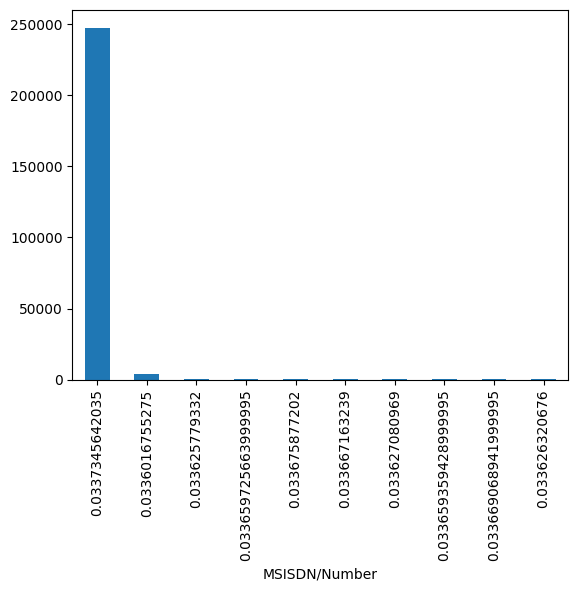

In [55]:
top_frequency.plot(kind='bar')

### Top ten session durations

In [56]:
print(top_duration)

MSISDN/Number
0.033735    2.433741e+09
0.033602    3.411218e+07
0.033626    4.135260e+06
0.033626    4.004601e+06
0.033615    3.897579e+06
0.033660    3.490608e+06
0.033676    3.330261e+06
0.033667    3.111859e+06
0.033603    2.853379e+06
0.033627    2.780470e+06
Name: Dur. (ms), dtype: float64


<Axes: xlabel='MSISDN/Number'>

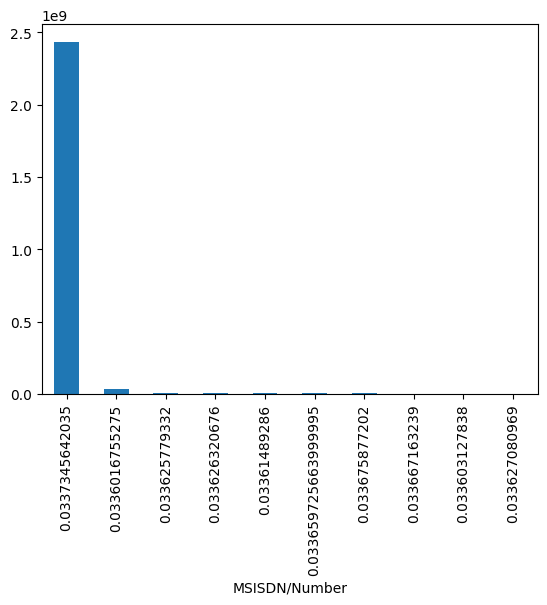

In [57]:
top_duration.plot(kind='bar')

### Top the total traffics

In [58]:
print(top_traffic)

MSISDN/Number
0.033735    1.202471e+07
0.033602    1.829512e+05
0.033615    8.846226e+03
0.033626    8.499621e+03
0.033626    7.971167e+03
0.033676    7.891111e+03
0.033660    7.705863e+03
0.033666    7.308501e+03
0.033665    6.872347e+03
0.033699    6.540899e+03
Name: Total_DL_+_UL, dtype: float64


<Axes: xlabel='MSISDN/Number'>

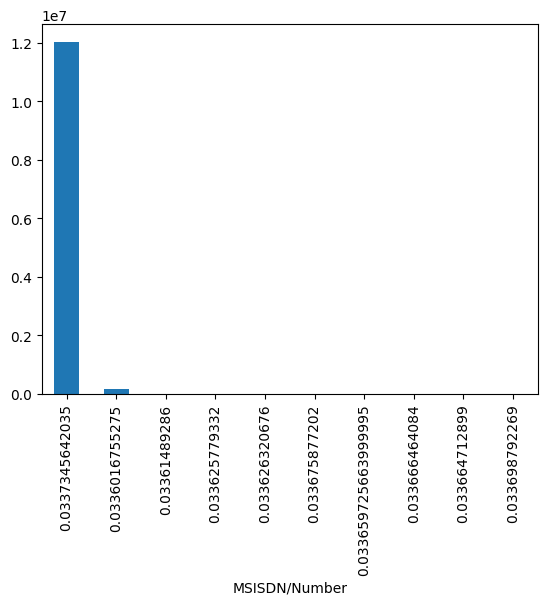

In [59]:
top_traffic.plot(kind='bar')

### Find most used applications

In [60]:
top_three_apps = xdr_data[['MSISDN/Number','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)', 'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other UL (Bytes)']].sum().nlargest(3)


### Top three most used applications

<Axes: >

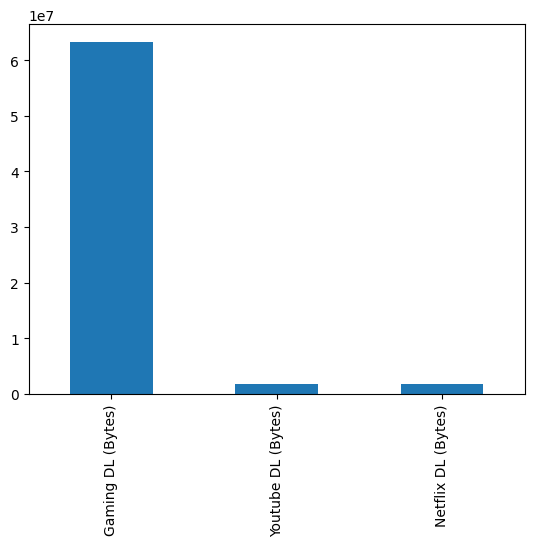

In [61]:
top_three_apps.plot(kind='bar')

### K-means clustering

In [62]:
cluster_one = aggregated_data[aggregated_data['clusters'] == 0]
cluster_two = aggregated_data[aggregated_data['clusters'] == 1]
cluster_three = aggregated_data[aggregated_data['clusters'] == 2]

In [63]:
print(cluster_one)

               Bearer Id  Dur. (ms)  Total_DL_+_UL  clusters
MSISDN/Number                                               
0.033602       13.114484    38503.0     339.616950         0
0.033602        6.917538    52478.0     900.610946         0
0.033602       14.627709   120298.0    1587.337140         0
0.033602       13.114484   176022.0     178.330679         0
0.033602        7.349883   127918.0     334.691441         0
...                  ...        ...            ...       ...
0.033700        7.349883   244912.0     336.433505         0
0.033700        7.349883   171672.0     827.412852         0
0.033700        6.917538     9498.0     584.400944         0
0.033700        7.277826    66045.0     481.066420         0
0.033700       13.114484   214209.0     394.753492         0

[90036 rows x 4 columns]


In [64]:
print(cluster_two)

                   Bearer Id     Dur. (ms)  Total_DL_+_UL  clusters
MSISDN/Number                                                      
0.033735       247554.418656  2.433741e+09   1.202471e+07         1


In [65]:
print(cluster_three)

                 Bearer Id   Dur. (ms)  Total_DL_+_UL  clusters
MSISDN/Number                                                  
0.033602       3603.373041  34112179.0  182951.226284         2


### Elbow method for defining the best number of clustering

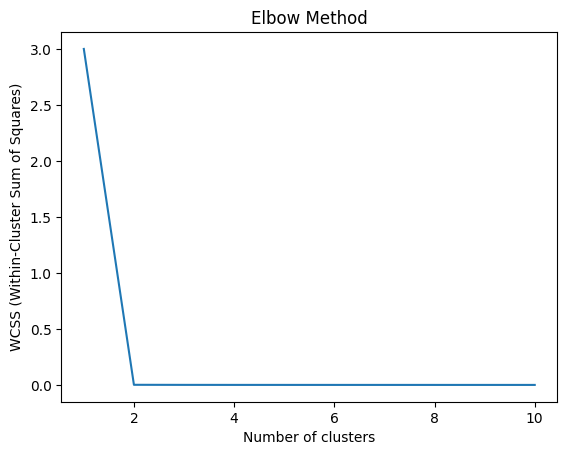

In [66]:
 # Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### Experience Analytics

#### Aggregate average TCP,RTT,TP and Handset type per user

In [67]:
def aggregate_average_xdr_data(data):
    # Aggregate data
    aggregated_average_df = data.groupby('MSISDN/Number').agg({
                                                            'TCP DL Retrans. Vol (Bytes)':'mean',
                                                            'TCP UL Retrans. Vol (Bytes)':'mean',
                                                            'Avg RTT DL (ms)':'mean',
                                                            'Avg RTT UL (ms)':'mean',
                                                            'Avg Bearer TP DL (kbps)':'mean',
                                                            'Avg Bearer TP UL (kbps)':'mean',
                                                            'Handset Type':'first'
                                                        })
    select_columns=aggregated_average_df[ ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)','Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']]
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(select_columns)

    normalized_data = pd.DataFrame(normalized_data)

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(normalized_data)
    aggregated_average_df['clusters'] = clusters

    return aggregated_average_df,clusters

In [68]:
aggregated_average,experience_clusters = aggregate_average_xdr_data(xdr_data)

In [69]:
aggregated_average.head(20)

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
0.033602,15.259102,0.585468,66.991436,8.645259,9263.906685,532.103064,Samsung Galaxy A5 Sm-A520F,1
0.033602,20.809914,0.759659,110.000000,5.000000,23.000000,47.000000,Apple iPhone Se (A1723),1
0.033602,0.575194,0.044040,145.000000,7.000000,7677.000000,2115.000000,Apple iPhone 6 (A1586),2
0.033602,17.981367,0.441903,104.397853,18.831441,24626.750000,676.500000,Samsung Galaxy S8 Plus (Sm-G955F),0
0.033602,20.809914,0.759659,29.000000,5.000000,63.000000,54.000000,Apple iPhone 7 Plus (A1784),1
0.033602,20.809914,0.759659,109.795706,17.662883,12.000000,64.000000,Samsung Galaxy S8 (Sm-G950F),1
0.033602,20.809914,0.759659,46.000000,8.000000,2952.500000,140.500000,Apple iPhone X (A1901),1
0.033602,10.459467,0.759659,33.500000,20.828604,24627.750000,600.000000,Huawei P10 Lite,0
0.033602,20.809914,0.759659,35.000000,5.000000,51.000000,48.000000,Huawei P20 Pro,1


In [70]:
aggregated_average['Handset Type']

MSISDN/Number
0.033602           Samsung Galaxy A5 Sm-A520F
0.033602              Apple iPhone Se (A1723)
0.033602               Apple iPhone 6 (A1586)
0.033602    Samsung Galaxy S8 Plus (Sm-G955F)
0.033602          Apple iPhone 7 Plus (A1784)
                          ...                
0.033700          Samsung Galaxy J5 (Sm-J530)
0.033700               Apple iPhone 6 (A1586)
0.033700                       Huawei P9 Lite
0.033700                    Samsung Galaxy J7
0.033735             Samsung Galaxy A8 (2018)
Name: Handset Type, Length: 90038, dtype: object

In [71]:
def find_top_bottom_frequent(data, column_name, n=10):
    """
    Finds the top n, bottom n, and most frequent values for a given column.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to analyze.
        n (int): The number of values to find.

    Returns:
        tuple: A tuple containing the top n, bottom n, and most frequent values.
    """

    top_n = data[column_name].nlargest(n)
    bottom_n = data[column_name].nsmallest(n)
    most_frequent = data[column_name].value_counts().head(n)

    return top_n, bottom_n, most_frequent


# Find top, bottom, and most frequent values for TCP, RTT, and throughput
top_tcp_DL, bottom_tcp_DL, frequent_tcp_DL = find_top_bottom_frequent(aggregated_average, 'TCP DL Retrans. Vol (Bytes)')
top_tcp_UL, bottom_tcp_UL, frequent_tcp_UL = find_top_bottom_frequent(aggregated_average, 'TCP UL Retrans. Vol (Bytes)')
top_rtt_DL, bottom_rtt_DL, frequent_rtt_DL = find_top_bottom_frequent(aggregated_average, 'Avg RTT DL (ms)')
top_rtt_UL, bottom_rtt_UL, frequent_rtt_UL = find_top_bottom_frequent(aggregated_average, 'Avg RTT UL (ms)')
top_throughput_DL, bottom_throughputDL, frequent_throughput_DL = find_top_bottom_frequent(aggregated_average, 'Avg Bearer TP DL (kbps)')
top_throughput_UL, bottom_throughput_UL, frequent_throughput_UL = find_top_bottom_frequent(aggregated_average, 'Avg Bearer TP UL (kbps)')

# Print or analyze the results
print("Top TCP values:", top_tcp_DL)
print("Bottom TCP values:", top_tcp_UL)
print("Most frequent TCP values:", frequent_rtt_DL)
# ... (similarly for RTT and throughput)

Top TCP values: MSISDN/Number
0.033650    50.025388
0.033658    50.025388
0.033659    50.025388
0.033659    50.025388
0.033660    50.025388
0.033660    50.025388
0.033660    50.025388
0.033664    50.025388
0.033664    50.025388
0.033664    50.025388
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom TCP values: MSISDN/Number
0.033658    1.804633
0.033659    1.804633
0.033659    1.804633
0.033661    1.804633
0.033662    1.804633
0.033662    1.804633
0.033665    1.804633
0.033667    1.804633
0.033604    1.804633
0.033615    1.804633
Name: TCP UL Retrans. Vol (Bytes), dtype: float64
Most frequent TCP values: Avg RTT DL (ms)
109.795706    15445
221.989265     4755
28.000000      1981
27.000000      1669
34.000000      1543
37.000000      1387
35.000000      1383
38.000000      1376
29.000000      1318
36.000000      1292
Name: count, dtype: int64


In [72]:
def analyze_handset_metrics(data,avg_throughput):
  """
  Analyzes the distribution of average throughput  view per handset type.

  Args:
    data: The input DataFrame containing handset data.
  """

  # Calculate average throughput  count per handset type
  avg_throughput_DL_by_handset = data.groupby('Handset Type')[avg_throughput].mean()

  # Print the results
  print("Average Throughput per Handset Type:\n")
  print(avg_throughput_DL_by_handset.to_markdown())

In [73]:
analyze_handset_metrics(aggregated_average,'Avg Bearer TP DL (kbps)')

Average Throughput per Handset Type:

| Handset Type                                                                                |   Avg Bearer TP DL (kbps) |
|:--------------------------------------------------------------------------------------------|--------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                 6527      |
| A-Link Telecom I. Cubot Note S                                                              |                 8515      |
| A-Link Telecom I. Cubot Nova                                                                |                49210.5    |
| A-Link Telecom I. Cubot Power                                                               |                49210.5    |
| A-Link Telecom I. Cubot X18 Plus                                                            |                12108      |
| Acer Liquid M220                                                                            

In [74]:
analyze_handset_metrics(aggregated_average,'Avg Bearer TP UL (kbps)')


Average Throughput per Handset Type:

| Handset Type                                                                                |   Avg Bearer TP UL (kbps) |
|:--------------------------------------------------------------------------------------------|--------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                 172       |
| A-Link Telecom I. Cubot Note S                                                              |                 422       |
| A-Link Telecom I. Cubot Nova                                                                |                 550       |
| A-Link Telecom I. Cubot Power                                                               |                 342       |
| A-Link Telecom I. Cubot X18 Plus                                                            |                 451       |
| Acer Liquid M220                                                                            

In [75]:
def analyze_handset_metrics(data,tcp_retranzmission):
  """
  Analyzes the distribution of average TCP retransmission view per handset type.

  Args:
    data The input DataFrame containing handset data.
  """

  # Calculate average  TCP retransmission count per handset type
  avg_retransmission_by_handset = data.groupby('Handset Type')[tcp_retranzmission].mean()


  print("\nAverage TCP Retransmission Count per Handset Type:\n")
  print(avg_retransmission_by_handset.to_markdown())



In [76]:
analyze_handset_metrics(aggregated_average,'TCP DL Retrans. Vol (Bytes)')


Average TCP Retransmission Count per Handset Type:

| Handset Type                                                                                |   TCP DL Retrans. Vol (Bytes) |
|:--------------------------------------------------------------------------------------------|------------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                    0.602349   |
| A-Link Telecom I. Cubot Note S                                                              |                   41.3445     |
| A-Link Telecom I. Cubot Nova                                                                |                    0.13584    |
| A-Link Telecom I. Cubot Power                                                               |                    0.007799   |
| A-Link Telecom I. Cubot X18 Plus                                                            |                    1.33582    |
| Acer Liquid M220                                 

In [77]:
analyze_handset_metrics(aggregated_average,'TCP UL Retrans. Vol (Bytes)')


Average TCP Retransmission Count per Handset Type:



| Handset Type                                                                                |   TCP UL Retrans. Vol (Bytes) |
|:--------------------------------------------------------------------------------------------|------------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                    0.013864   |
| A-Link Telecom I. Cubot Note S                                                              |                    0.067252   |
| A-Link Telecom I. Cubot Nova                                                                |                    0.00133    |
| A-Link Telecom I. Cubot Power                                                               |                    0.000242   |
| A-Link Telecom I. Cubot X18 Plus                                                            |                    0.390088   |
| Acer Liquid M220                                                                            |         

### K-means cluster

In [78]:
# Assuming you have the segmented_data DataFrame
cluster_1 = aggregated_average[aggregated_average['clusters'] == 0]
cluster_2 = aggregated_average[aggregated_average['clusters'] == 1]
cluster_3 = aggregated_average[aggregated_average['clusters'] == 2]

In [79]:
cluster_1.head(cluster_1.size)

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
0.033602,17.981367,0.441903,104.397853,18.831441,24626.75,676.50,Samsung Galaxy S8 Plus (Sm-G955F),0
0.033602,10.459467,0.759659,33.500000,20.828604,24627.75,600.00,Huawei P10 Lite,0
0.033602,11.058901,0.437295,115.000000,6.500000,16849.50,1391.75,Apple iPhone Se (A1723),0
0.033602,12.877313,0.384510,39.000000,9.000000,23351.50,1383.25,Huawei Lld-Al00,0
0.033602,10.427166,0.004655,45.500000,39.657207,3879.00,2025.25,Samsung Galaxy S7 (Sm-G930X),0
...,...,...,...,...,...,...,...,...
0.033700,1.312485,0.006848,26.000000,18.000000,27264.00,2729.50,Apple iPhone Se (A1723),0
0.033700,5.760880,0.233833,42.000000,7.000000,33904.25,1861.50,Apple iPhone X (A1901),0
0.033700,0.762494,0.759659,29.000000,39.657207,49210.50,1737.00,Google Inc G011C,0


In [80]:
cluster_2.head(cluster_2.size)

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
0.033602,15.259102,0.585468,66.991436,8.645259,9263.906685,532.103064,Samsung Galaxy A5 Sm-A520F,1
0.033602,20.809914,0.759659,110.000000,5.000000,23.000000,47.000000,Apple iPhone Se (A1723),1
0.033602,20.809914,0.759659,29.000000,5.000000,63.000000,54.000000,Apple iPhone 7 Plus (A1784),1
0.033602,20.809914,0.759659,109.795706,17.662883,12.000000,64.000000,Samsung Galaxy S8 (Sm-G950F),1
0.033602,20.809914,0.759659,46.000000,8.000000,2952.500000,140.500000,Apple iPhone X (A1901),1
...,...,...,...,...,...,...,...,...
0.033700,20.809914,0.759659,37.000000,2.000000,8.000000,13.000000,Samsung Galaxy J5 (Sm-J530),1
0.033700,20.809914,0.759659,109.795706,17.662883,6.000000,9.000000,Samsung Galaxy J5 (Sm-J530),1
0.033700,0.006785,0.759659,20.000000,9.000000,8018.000000,174.000000,Huawei P9 Lite,1


In [81]:
cluster_3.head(cluster_3.size)

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
0.033602,0.575194,0.044040,145.000000,7.000000,7677.000,2115.0,Apple iPhone 6 (A1586),2
0.033602,0.000222,0.001330,162.000000,6.000000,85.000,44.0,Samsung Galaxy Y (Gt-S5360),2
0.033602,0.019631,0.002237,192.000000,21.000000,3713.000,2295.0,Xiaomi Communica. Redmi Note5,2
0.033602,7.419592,0.274625,131.663088,17.885736,6328.000,477.0,Huawei Honor 9 Lite,2
0.033602,0.099152,0.004146,205.000000,8.000000,4324.000,255.0,Wiko Global Sasu Sunny3,2
...,...,...,...,...,...,...,...,...
0.033700,2.635971,0.576832,103.224463,35.661464,3171.125,339.5,Huawei B528S-23A,2
0.033700,3.281362,0.093167,221.989265,6.000000,6014.000,379.0,Wiko Global Sasu Sunny3,2
0.033700,12.114087,0.490600,221.989265,27.000000,23584.000,1379.0,Samsung Galaxy J7,2


## Satisfaction Analysis

### Assign engagement and experience scores to users

In [82]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

def assign_engagement_experience_scores(data, engagement_clusters,experience_clusters):
  """
  Assigns engagement and experience scores to users based on Euclidean distance.

  Args:
    data (pd.DataFrame): The input DataFrame containing user data.
    engagement_clusters (pd.DataFrame): The DataFrame with engagement clusters.
    experience_clusters (pd.DataFrame): The DataFrame with experience clusters.

  Returns:
    pd.DataFrame: A DataFrame with assigned engagement and experience scores.
  """
  engagement_clusters = engagement_clusters.drop('clusters', axis=1)
  experience_clusters = experience_clusters.drop(['clusters','Handset Type'], axis=1)

  # Calculate Euclidean distance between user data points and cluster centroids
  engagement_distances = euclidean_distances(data[['Bearer Id','Dur. (ms)','Total_DL_+_UL']], engagement_clusters.iloc[0].values.reshape(1, -1))
  experience_distances = euclidean_distances(data[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)','Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']], experience_clusters.iloc[2].values.reshape(1, -1))

  # Assign engagement and experience scores based on distances
  # Engagement score: A lower score indicates higher engagement as the user is closer to the less engaged cluster.
  # Experience score: A lower score indicates a better experience as the user is closer to the worst experience cluster.
  data['engagement_score'] = engagement_distances.min(axis=1)
  data['experience_score'] = experience_distances.min(axis=1)

  return data

# Example usage:
# Assuming you have a DataFrame named 'data' and cluster dataframes 'engagement_clusters' and 'experience_clusters'
data_with_scores = assign_engagement_experience_scores(xdr_data, aggregated_data,aggregated_average)

In [83]:
data_with_scores.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score
0,13.114483,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,208.201448,0.033665,35.521210,9.16456699548519E+015,...,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5,3.386776e+07,7929.929379
1,13.114483,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,208.201909,0.033682,35.794009,L77566A,...,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5,3.386776e+07,7941.136944
2,13.114483,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,208.200846,0.033735,35.281510,D42335A,...,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5,3.386776e+07,7954.950660
3,13.114483,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,208.201402,0.033735,35.356610,T21824A,...,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5,3.386776e+07,7909.076621
4,13.114483,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,208.201401,0.033700,35.407010,D88865A,...,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5,3.386776e+07,7954.950660


### Calculate a satisfaction score based on the average of engagement and experience scores

In [84]:
import pandas as pd

def calculate_satisfaction_score(data):
    """
    Calculates a satisfaction score based on engagement and experience scores.

    Args:
        data (pd.DataFrame): The input DataFrame containing user data.

    Returns:
        pd.Series: A Series with satisfaction scores for each user.
    """

    data['satisfaction_score'] = (data['engagement_score'] + data['experience_score']) / 2
    return data

def find_top_satisfied_customers(data, n=10):
    """
    Finds the top n satisfied customers based on their satisfaction score.

    Args:
        data (pd.DataFrame): The input DataFrame containing user data.
        n (int): The number of top customers to find.

    Returns:
        pd.Series: A Series with the top n customer IDs.
    """

    top_satisfied = data.nlargest(n, 'satisfaction_score')['MSISDN/Number']
    return top_satisfied

In [85]:
data_with_satisfaction = calculate_satisfaction_score(xdr_data)

In [86]:
top_satisfied_customers = find_top_satisfied_customers(data_with_satisfaction, 10)

print("Top 10 satisfied customers:")
print(top_satisfied_customers)

Top 10 satisfied customers:
24744    0.033659
22710    0.033735
24339    0.033667
23776    0.033667
21837    0.033684
23294    0.033735
22896    0.033735
22184    0.033735
21046    0.033620
20856    0.033735
Name: MSISDN/Number, dtype: float64


### Build a regression model to predict customer satisfaction scores based on engagement and experience

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def build_regression_model(data):
  """
  Builds a regression model to predict satisfaction score.

  Args:
    data (pd.DataFrame): The input DataFrame containing user data.

  Returns:
    tuple: A tuple containing the trained model, R-squared score, and mean squared error.
  """

  # Split data into features and target variable
  X = data[['engagement_score', 'experience_score']]
  y = data['satisfaction_score']

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create and train a linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  return model, r2, mse



In [88]:
model, r2, mse = build_regression_model(xdr_data)

print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 1.0
Mean Squared Error: 1.3955500829104175e-17


## Make predictions

In [89]:
new_user_data = pd.DataFrame({'engagement_score': [0.8,0.4],
                             'experience_score': [0.7,0.3]})

# Make predictions using the trained model
predicted_satisfaction_score = model.predict(new_user_data)

print("Predicted satisfaction score:", predicted_satisfaction_score)

Predicted satisfaction score: [0.75000001 0.35000001]


### Segment users into two clusters based on engagement and experience scores using k-means clustering

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def segment_users_k_means(data):
  """
  Segments users into two clusters based on engagement and experience scores.

  Args:
    data (pd.DataFrame): The input DataFrame containing user data.

  Returns:
    pd.DataFrame: A DataFrame with segmented users.
  """

  # Select relevant columns
  engagement_experience_metrics = data[['engagement_score', 'experience_score']]

  # Standardize the data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(engagement_experience_metrics)

  # Perform k-means clustering
  kmeans = KMeans(n_clusters=2, random_state=42)
  clusters = kmeans.fit_predict(scaled_data)

  # Add cluster labels to the original DataFrame
  data['engagement_experience_segment'] = clusters

  return data

In [91]:
segmented_data = segment_users_k_means(xdr_data)

In [92]:
cluster_segmented_1=segmented_data[segmented_data['engagement_experience_segment']==0]
cluster_segmented_2=segmented_data[segmented_data['engagement_experience_segment']==1]

In [93]:
cluster_segmented_1.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score,satisfaction_score,engagement_experience_segment
0,13.114483,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,208.201448,0.033665,35.521210,9.16456699548519E+015,...,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5,3.386776e+07,7929.929379,1.693784e+07,0
1,13.114483,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,208.201909,0.033682,35.794009,L77566A,...,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5,3.386776e+07,7941.136944,1.693785e+07,0
2,13.114483,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,208.200846,0.033735,35.281510,D42335A,...,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5,3.386776e+07,7954.950660,1.693786e+07,0
3,13.114483,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,208.201402,0.033735,35.356610,T21824A,...,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5,3.386776e+07,7909.076621,1.693783e+07,0
4,13.114483,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,208.201401,0.033700,35.407010,D88865A,...,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5,3.386776e+07,7954.950660,1.693786e+07,0


In [94]:
cluster_segmented_2.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score,satisfaction_score,engagement_experience_segment
175,13.042426,4/23/2019 3:28,783.0,4/25/2019 0:58,173.0,163788.0,208.201715,0.033658,86.376903,T42204B,...,473.263125,9.759651,37.927986,522.876617,560.804603,Decile 5,3.394888e+07,41545.625180,1.699521e+07,1
188,13.042426,4/23/2019 6:32,113.0,4/25/2019 0:01,108.0,149331.0,208.201907,0.033646,35.311809,D77577C,...,691.568588,3.686384,17.891454,627.612616,645.504070,Decile 5,3.396334e+07,32982.613781,1.699816e+07,1
193,7.277826,4/23/2019 7:01,622.0,4/25/2019 0:26,84.0,149144.0,208.202201,0.033661,86.293404,D10346A,...,810.816229,11.382119,40.880877,810.099935,850.980812,Decile 5,3.396352e+07,41538.220422,1.700253e+07,1
216,7.277826,4/23/2019 8:27,578.0,4/24/2019 23:28,37.0,140467.0,208.201715,0.033659,86.376903,T48261A,...,112.030473,6.018317,52.084023,699.290537,751.374560,Decile 4,3.397220e+07,30798.213391,1.700150e+07,1
254,10.138875,4/24/2019 20:08,170.0,4/25/2019 1:45,170.0,20247.0,208.201640,0.033735,48.474548,D41377B,...,749.642316,14.010369,36.140598,376.306114,412.446712,Decile 1,3.409242e+07,7893.236722,1.705016e+07,1


### calculate the average satisfaction and experience scores for each of the two clusters

In [95]:
import pandas as pd

def aggregate_cluster_scores(data):
  """
  Aggregates the average satisfaction and experience scores per cluster.

  Args:
    data (pd.DataFrame): The input DataFrame containing user data.

  Returns:
    pd.DataFrame: A DataFrame with aggregated cluster scores.
  """

  cluster_stats = data.groupby('engagement_experience_segment')[['satisfaction_score', 'experience_score']].mean()
  return cluster_stats

In [96]:
cluster_scores = aggregate_cluster_scores(segmented_data)
print(cluster_scores)

                               satisfaction_score  experience_score
engagement_experience_segment                                      
0                                    1.697359e+07       8733.029518
1                                    1.703001e+07      15239.876268


### export a DataFrame containing user IDs, engagement, experience, and satisfaction scores to a MySQL database and query the exported table.

In [99]:
from src.dbconnection import export_eng_exp_sat_to_psql

In [100]:
export_eng_exp_sat_to_psql(xdr_data)